In [1]:
#installing packages 

import numpy as np
import pandas as pd
from pandas_datareader import data as web
import pandas_datareader
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# set the dates for the analysis

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)

In [3]:
Amazon = web.DataReader('AMZN', 'yahoo', start, end)
Walmart = web.DataReader('WMT', 'yahoo', start, end)
Target = web.DataReader('TGT', 'yahoo', start, end)

In [11]:
Amazon['MACD'] = Amazon['Close'].ewm(span=12, adjust=False).mean() - Amazon['Close'].ewm(span=26, adjust=False).mean()
Walmart['MACD'] = Walmart['Close'].ewm(span=12, adjust=False).mean() - Walmart['Close'].ewm(span=26, adjust=False).mean()
Target['MACD'] = Target['Close'].ewm(span=12, adjust=False).mean() - Target['Close'].ewm(span=26, adjust=False).mean()

Amazon['baseline'] = 0
Walmart['baseline'] = 0
Target['baseline'] = 0



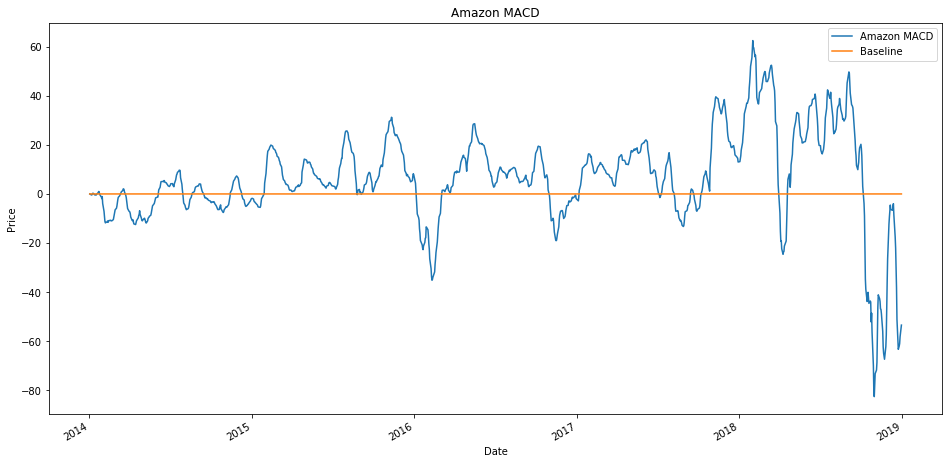

In [12]:
Amazon['MACD'].plot(label='Amazon MACD',figsize=(16,8))
Amazon['baseline'].plot(label='Baseline')

_ = plt.xlabel('Date')

_ = plt.ylabel('Price')

_ = plt.title('Amazon MACD')

plt.legend();

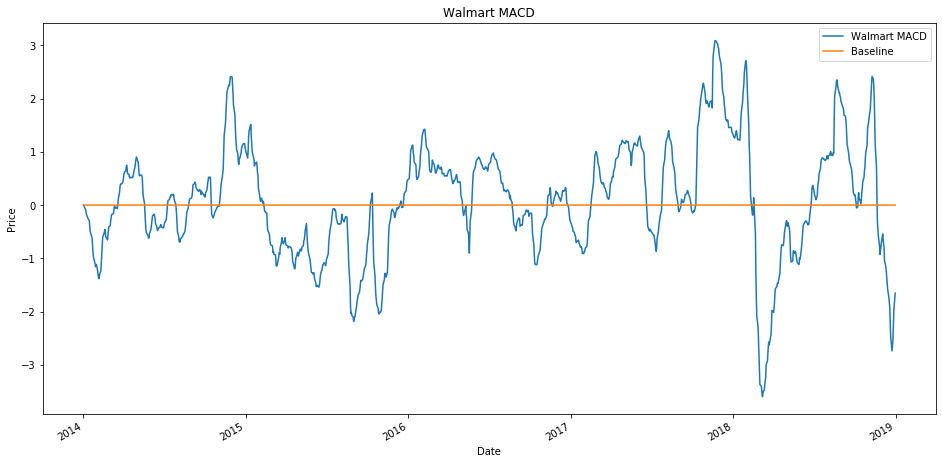

In [13]:
Walmart['MACD'].plot(label='Walmart MACD',figsize=(16,8))
Walmart['baseline'].plot(label='Baseline')

_ = plt.xlabel('Date')

_ = plt.ylabel('Price')

_ = plt.title('Walmart MACD')

plt.legend();

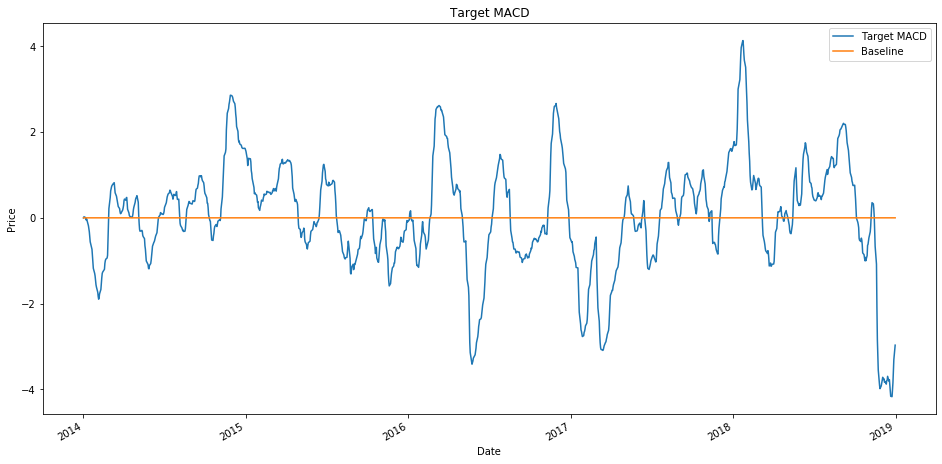

In [14]:
Target['MACD'].plot(label='Target MACD',figsize=(16,8))
Target['baseline'].plot(label='Baseline')

_ = plt.xlabel('Date')

_ = plt.ylabel('Price')

_ = plt.title('Target MACD')

plt.legend();

In [22]:
 ema_12 = Target['Close'].ewm(span=12, adjust=False).mean()
    ema_16 = Target['Close'].ewm(span=26, adjust=False).mean()

In [20]:
macd = ema_12-ema_16
signal_line = macd.ewm(span=9, adjust=False).mean()

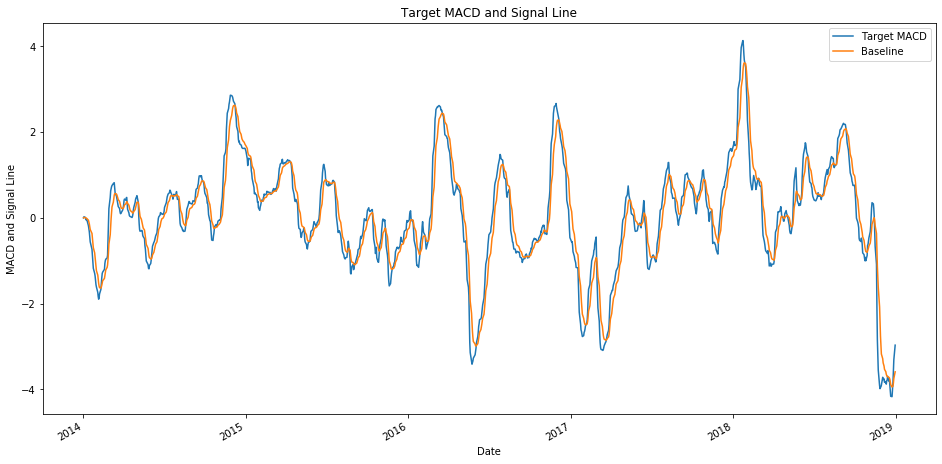

In [23]:
macd.plot(label='Target MACD',figsize=(16,8))
signal_line.plot(label='Baseline')

_ = plt.xlabel('Date')

_ = plt.ylabel('MACD and Signal Line')

_ = plt.title('Target MACD and Signal Line')

plt.legend();